In [197]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)



In [198]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [199]:
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [200]:
comb_data_df = pd.merge(ride_data_df, city_data_df, on="city", how='outer')
comb_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [201]:
# average fare per city

avg_fare_city = comb_data_df.groupby('city')['fare'].mean()

avg_fare_city

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [202]:
# total rides per city

total_rides_city = comb_data_df.groupby('city')['ride_id'].count()

total_rides_city

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [203]:
# total drivers per city

total_drivers_city = comb_data_df.groupby('city')['driver_count'].mean()

total_drivers_city

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [204]:
# city type

city_type = city_data_df.set_index('city')['type']

city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [205]:
cities_data_df = pd.DataFrame({"average fare per city": avg_fare_city,
                           "total rides per city": total_rides_city,
                           "total drivers per city": total_drivers_city,
                           "city type": city_type})

cities_data_df.head()

,average fare per city,total rides per city,total drivers per city,city type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [206]:
urb = cities_data_df.loc[cities_data_df['city type']=='Urban']
sub = cities_data_df.loc[cities_data_df['city type']=='Suburban']
rur = cities_data_df.loc[cities_data_df['city type']=='Rural']

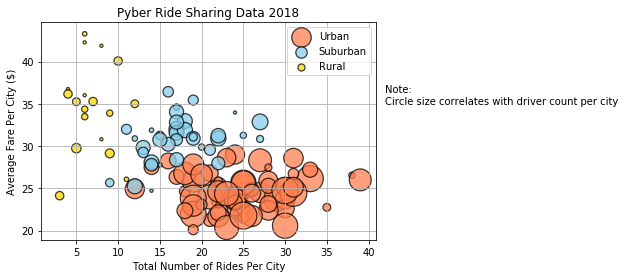

In [207]:
plt.scatter(urb['total rides per city'], urb['average fare per city'], color='Coral', 
            s=urb['total drivers per city']*10, edgecolors='black', label='Urban', alpha=0.75, linewidth=1.25)

plt.scatter(sub['total rides per city'], sub['average fare per city'], color='Skyblue', 
            s=sub['total drivers per city']*10, edgecolors='black', label='Suburban', alpha=0.75, linewidth=1.25)

plt.scatter(rur['total rides per city'], rur['average fare per city'], color='Gold', 
            s=rur['total drivers per city']*10, edgecolors='black', label='Rural', alpha=0.75, linewidth=1.25)


plt.title("Pyber Ride Sharing Data 2018")

plt.xlabel("Total Number of Rides Per City")

plt.ylabel("Average Fare Per City ($)")

plt.text(42,35,"""Note: 
Circle size correlates with driver count per city""")

plt.legend()

plt.grid()


type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64


Text(0.5, 1.0, '% of Total Fares by City Type')

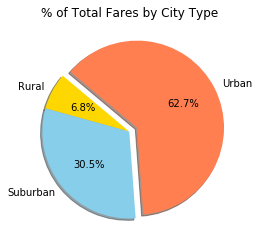

In [208]:
# percent of total fares by city type
fares_city_type = comb_data_df.groupby('type')['fare'].sum()
total_fares = fares_city_type.sum()

total_fares_by_city = fares_city_type/total_fares

print(total_fares_by_city)

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", 'Skyblue', 'Coral']

explode = [0, 0, 0.1]


plt.pie(total_fares_by_city, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64


Text(0.5, 1.0, '% of Total Rides by City Type')

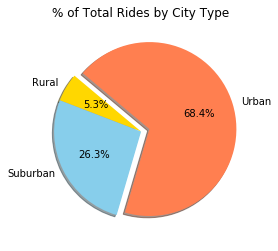

In [209]:
# percent of total rides by city type
rides_city_type = comb_data_df.groupby('type')['ride_id'].count()
total_rides = rides_city_type.sum()

total_rides_by_city = rides_city_type/total_rides

print(total_rides_by_city)

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", 'Skyblue', 'Coral']

explode = [0, 0, 0.1]


plt.pie(total_rides_by_city, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")


type
Rural       0.026236
Suburban    0.164817
Urban       0.808947
Name: driver_count, dtype: float64


Text(0.5, 1.0, '% of Total Drivers by City Type')

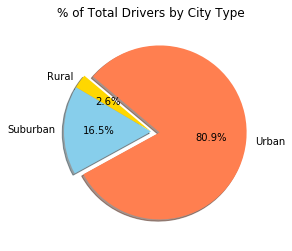

In [210]:
drivers_city_type = city_data_df.groupby('type')['driver_count'].sum()
total_drivers_count = city_data_df['driver_count'].sum()

total_drivers_by_city = drivers_city_type/total_drivers_count

print(total_drivers_by_city)

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", 'Skyblue', 'Coral']

explode = [0, 0, 0.1]


plt.pie(total_drivers_by_city, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

In [ ]:
*OBSERVATIONAL TRENDS*

1. Even though the majority of rural rides have the lowest total number of rides, they have the some of the 
highest average fares per city. This would suggest that rides in rural areas have to travel further distances
as opposed to urban areas

2. Driver competition plays a factor in ride fares. Urban cities have the highest number of drivers and the 
highest number of rides but have the lowest average fares.

3. Suburban drivers collect relativly higher average fares compared to urban and rural drivers.